In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

import folium
from folium.features import GeoJsonTooltip

In [2]:
data_google= pd.read_csv("educacion_y_trabajo.csv")

data_geo= pd.read_csv("interes_por_region.csv")

In [3]:
tendencia= pd.DataFrame(data_google)

In [4]:
tendencia

,Temporalidad,Tasa de búsqueda
0,2019-06-23,0
1,2019-06-30,0
2,2019-07-07,0
3,2019-07-14,0
4,2019-07-21,0
...,...,...
257,2024-05-26,0
258,2024-06-02,0
259,2024-06-09,33
260,2024-06-16,53


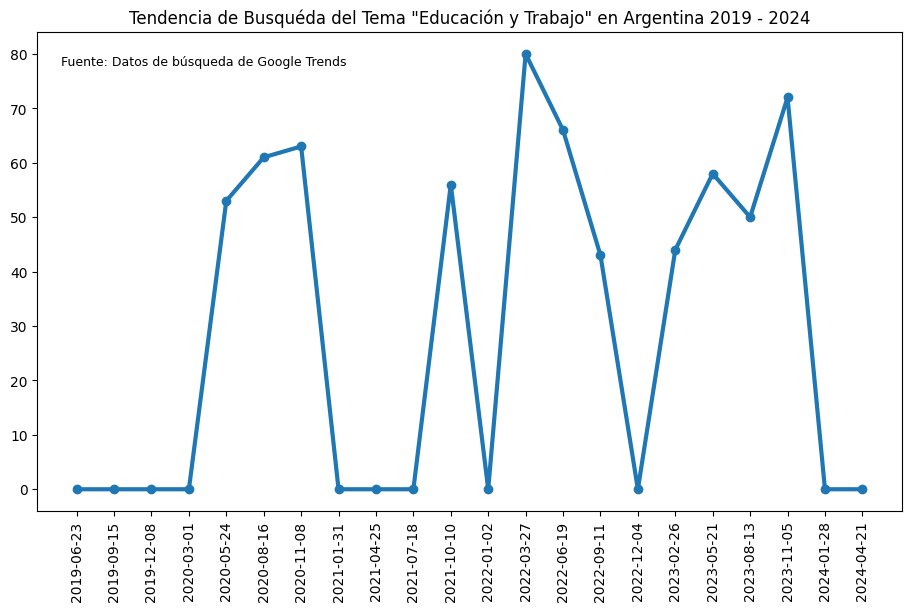

In [5]:
fig, axes= plt.subplots(figsize=(9, 6), layout='constrained')

axes.plot(tendencia['Temporalidad'].iloc[0::12], tendencia['Tasa de búsqueda'].iloc[0::12], marker='o', linewidth=3)

plt.title('Tendencia de Busquéda del Tema "Educación y Trabajo" en Argentina 2019 - 2024')

plt.figtext(0.22, 0.9, 'Fuente: Datos de búsqueda de Google Trends', ha='center', fontsize=9)
axes.tick_params(axis='x', rotation=90)
plt.show()

In [6]:
data_geo= pd.DataFrame(data_geo)

data_geo

,Región,Intención de búsqueda
0,Formosa,100
1,Chaco,100
2,La Rioja,97
3,Jujuy,81
4,Salta,81
5,Santiago del Estero,75
6,Catamarca,75
7,Tierra del Fuego,70
8,San Juan,63
9,San Luis,63


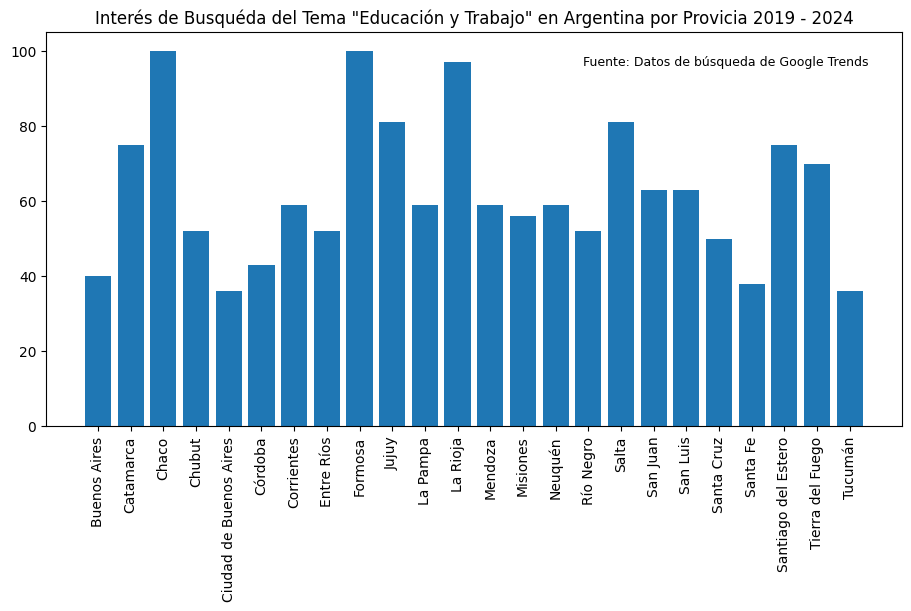

In [9]:
fig, axes= plt.subplots(figsize=(9, 6), layout='constrained')

axes.bar(data_geo['Región'], data_geo['Intención de búsqueda'])

plt.title('Interés de Busquéda del Tema "Educación y Trabajo" en Argentina por Provicia 2019 - 2024')

axes.tick_params(axis='x', rotation=90)

plt.figtext(0.8, 0.9, 'Fuente: Datos de búsqueda de Google Trends', ha='center', fontsize=9)

plt.show()

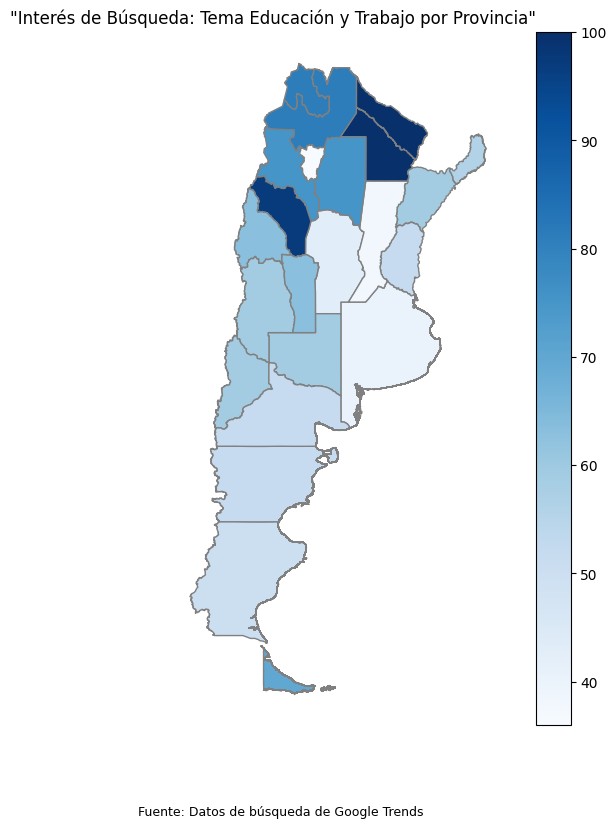

In [8]:
# Cargar el shapefile de Argentina
gdf= gpd.read_file('geodata/gadm41_ARG_1.shp')


# Unir los datos de interés con el GeoDataFrame
data_geo= gdf.merge(data_geo, how='left', left_on='NAME_1', right_on='Región')

# Plotear el mapa
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

data_geo.plot(column='Intención de búsqueda', ax=ax, legend=True, cmap='Blues', edgecolor='grey')

plt.title('"Interés de Búsqueda: Tema Educación y Trabajo por Provincia"', x=0.3, y=1)

ax.set_axis_off()

plt.figtext(0.5, 0.01, 'Fuente: Datos de búsqueda de Google Trends', ha='center', fontsize=9)

plt.show()